In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
dataset_dir = './AIRFORCE_classification'
# 이미지 전처리
# 이미지 전처리
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,
    shuffle=False
)
for data_batch in data_generator:
    print(data_batch.shape)
    break  # 첫 번째 배치만 출력하고 중지

Found 960 images belonging to 3 classes.
(32, 64, 64, 3)


In [3]:
# 모든 배치 데이터를 하나의 배열에 담기
import os
data_list = []
file_names = data_generator.filepaths
for i in range(len(data_generator)):
    data_batch = data_generator[i]
    data_list.append(data_batch)

data = np.concatenate(data_list, axis=0)

# Convolutional Autoencoder 모델 정의
input_img = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same', name='encoded_layer')(x)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습
autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True)





Epoch 1/50

30/30 [==============================] - 2s 31ms/step - loss: 0.6560
Epoch 2/50
30/30 [==============================] - 1s 29ms/step - loss: 0.6136
Epoch 3/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5968
Epoch 4/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5894
Epoch 5/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5841
Epoch 6/50
30/30 [==============================] - 1s 29ms/step - loss: 0.5833
Epoch 7/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5787
Epoch 8/50
30/30 [==============================] - 1s 29ms/step - loss: 0.5780
Epoch 9/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5764
Epoch 10/50
30/30 [==============================] - 1s 29ms/step - loss: 0.5759
Epoch 11/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5752
Epoch 12/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5741
Epoch 13/50
30/30 [==============

30/30 [==============================] - 0s 4ms/step


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


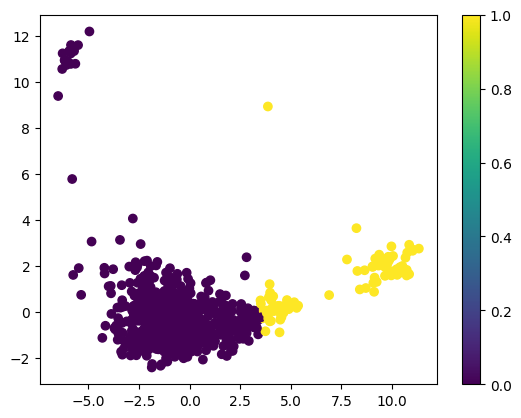

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
# 임베딩 생성
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_layer').output)
embeddings = encoder.predict(data)

# 임베딩을 2차원으로 축소 (PCA 사용)
embeddings_flat = embeddings.reshape((embeddings.shape[0], -1))
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings_flat)

# K-means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=0).fit(embeddings_pca)
labels = kmeans.labels_

# 파일명과 라벨을 DataFrame으로 저장
file_names = [os.path.basename(f) for f in file_names]
df = pd.DataFrame({'file_name': file_names, 'label': labels})

# CSV 파일로 저장
df.to_csv('clustered_labels.csv', index=False)
# 클러스터링 결과 시각화
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels)
plt.colorbar()
plt.show()

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# 데이터셋 경로
dataset_dir = './AIRFORCE_classification'

# 이미지 전처리
datagen = ImageDataGenerator(rescale=1./255)

data_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# 모든 배치 데이터를 하나의 배열에 담기
data_list = []
file_names = data_generator.filepaths
for i in range(len(data_generator)):
    data_batch = data_generator[i]
    data_list.append(data_batch)

data = np.concatenate(data_list, axis=0)


Found 960 images belonging to 1 classes.


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Convolutional Autoencoder 모델 정의
input_img = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded_layer')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습
autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50
30/30 [==============================] - 1s 27ms/step - loss: 0.6516
Epoch 2/50
30/30 [==============================] - 1s 27ms/step - loss: 0.6062
Epoch 3/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5935
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5865
Epoch 5/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5846
Epoch 6/50
30/30 [==============================] - 1s 26ms/step - loss: 0.5812
Epoch 7/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5802
Epoch 8/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5795
Epoch 9/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5788
Epoch 10/50
30/30 [==============================] - 1s 26ms/step - loss: 0.5767
Epoch 11/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5786
Epoch 12/50
30/30 [==============================] - 1s 27ms/step - loss: 0.5767
Epoch 13/50
30/30 [==================

In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

# 임베딩 생성
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_layer').output)
embeddings = encoder.predict(data)

# 임베딩을 2차원으로 축소 (PCA 사용)
embeddings_flat = embeddings.reshape((embeddings.shape[0], -1))
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings_flat)

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings_pca)
labels = kmeans.labels_

# 파일명과 라벨을 DataFrame으로 저장
file_names = [os.path.basename(f) for f in file_names]
df = pd.DataFrame({'file_name': file_names, 'label': labels})

# CSV 파일로 저장
df.to_csv('clustered_labels_3.csv', index=False)


30/30 [==============================] - 0s 2ms/step


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 경로
dataset_dir = './AIRFORCE_classification'

# 이미지 전처리
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 770 images belonging to 3 classes.
Found 190 images belonging to 3 classes.


In [6]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Pretrained EfficientNetB0 모델 불러오기
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 모델 수정
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3개의 클래스: full, part, etc

model = Model(inputs=base_model.input, outputs=predictions)

# 기본 모델의 레이어를 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# 일부 레이어의 동결을 해제하고 다시 학습
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 모델 재컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 재학습
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10

24/24 [==============================] - 12s 368ms/step - loss: 1.1474 - accuracy: 0.4539 - val_loss: 0.9907 - val_accuracy: 0.5188
Epoch 2/10
24/24 [==============================] - 8s 328ms/step - loss: 0.9824 - accuracy: 0.5149 - val_loss: 1.0266 - val_accuracy: 0.5312
Epoch 3/10
24/24 [==============================] - 8s 324ms/step - loss: 0.9950 - accuracy: 0.5203 - val_loss: 0.9702 - val_accuracy: 0.5188
Epoch 4/10
24/24 [==============================] - 8s 328ms/step - loss: 1.0049 - accuracy: 0.4851 - val_loss: 1.0111 - val_accuracy: 0.3250
Epoch 5/10
24/24 [==============================] - 8s 346ms/step - loss: 0.9937 - accuracy: 0.4743 - val_loss: 0.9594 - val_accuracy: 0.5312
Epoch 6/10
24/24 [==============================] - 8s 328ms/step - loss: 1.0140 - accuracy: 0.4946 - val_loss: 1.0579 - val_accuracy: 0.3625
Epoch 7/10
24/24 [==============================] - 8s 329ms/step - loss: 1.0116 - accuracy: 0.5054 - val_loss: 1.0759 - val_accuracy: 0.5312
Epoc

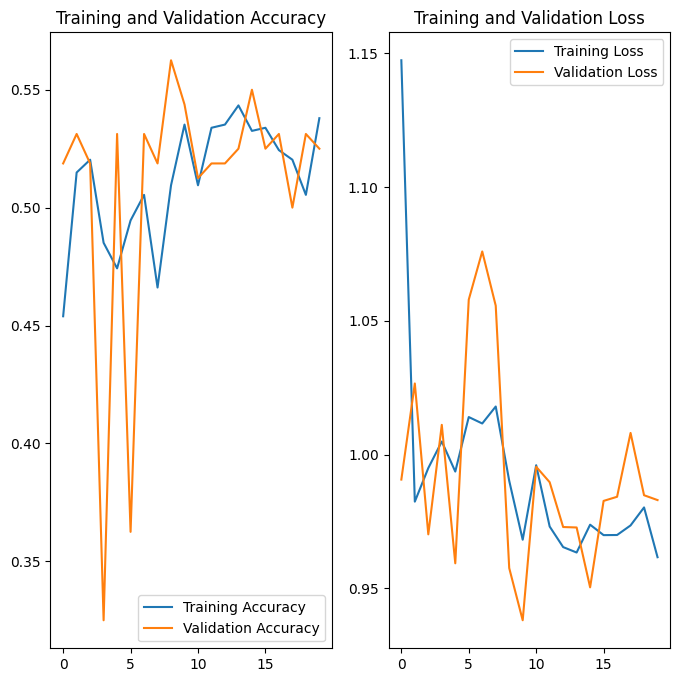

5/5 [==============================] - 2s 294ms/step - loss: 1.0104 - accuracy: 0.5188
Validation Accuracy: 51.88%


In [7]:
import matplotlib.pyplot as plt

# 학습 중의 정확도와 손실 그래프 그리기
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 검증 세트에서 정확도 평가
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


In [44]:
import pandas as pd
import numpy as np

# 예측 생성
train_files = train_generator.filenames
validation_files = validation_generator.filenames
file_paths = train_files + validation_files

train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)
predictions = np.concatenate((train_predictions, validation_predictions), axis=0)

# 예측된 클래스 라벨
predicted_classes = np.argmax(predictions, axis=1)

# 파일명과 예측된 라벨을 DataFrame으로 저장
df = pd.DataFrame({'file_name': file_paths, 'label': predicted_classes})

# CSV 파일로 저장
df.to_csv('classified_labels_supervised.csv', index=False)


6/6 [==============================] - 2s 257ms/step


## CNN

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


In [10]:
# 원본 데이터 경로
dataset_dir = './airforce_tot_classification'

# 임시 폴더 생성
train_dir = './airforce_tot_classification/train'
val_dir = './airforce_tot_classification/val'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# 클래스 폴더 생성
classes = ['Full', 'ETC']
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)


In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 검증 세트로 나누기
for cls in classes:
    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, cls, img))
    
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, cls, img))

In [12]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 변환 및 전처리
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# 데이터 로더 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [13]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 2)  # 2개의 클래스: full, etc
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 모델 초기화 및 GPU 설정
model = CNNModel().to(device)


In [14]:
import torch.optim as optim

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # 옵티마이저 초기화
        optimizer.zero_grad()
        
        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 최적화
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/10], Loss: 0.6864
Epoch [2/10], Loss: 0.6487
Epoch [3/10], Loss: 0.5936
Epoch [4/10], Loss: 0.5228
Epoch [5/10], Loss: 0.4864
Epoch [6/10], Loss: 0.4348
Epoch [7/10], Loss: 0.3773
Epoch [8/10], Loss: 0.3165
Epoch [9/10], Loss: 0.2490
Epoch [10/10], Loss: 0.1865


In [15]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total:.2f}%')


Validation Accuracy: 74.86%


In [16]:
import pandas as pd
import numpy as np

# 예측 생성
file_paths = [f[0] for f in train_loader.dataset.samples] + [f[0] for f in val_loader.dataset.samples]
predictions = []

model.eval()
with torch.no_grad():
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
    
    for images, _ in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

# 파일명과 예측된 라벨을 DataFrame으로 저장
df = pd.DataFrame({'file_name': file_paths, 'label': predictions})

# CSV 파일로 저장
df.to_csv('classified_labels.csv', index=False)


## ResNET

In [17]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 변환 및 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# 데이터 로더 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [18]:
import torchvision.models as models
import torch.nn as nn

# Pretrained ResNet18 모델 불러오기
model = models.resnet18(pretrained=True)

# 마지막 레이어 수정
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2개의 클래스: full, etc

# 모델을 GPU로 전송
model = model.to(device)


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\sunwoong/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 48.2MB/s]


In [19]:
import torch.optim as optim

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # 옵티마이저 초기화
        optimizer.zero_grad()
        
        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 최적화
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/10], Loss: 0.3993
Epoch [2/10], Loss: 0.2207
Epoch [3/10], Loss: 0.2012
Epoch [4/10], Loss: 0.1010
Epoch [5/10], Loss: 0.0780
Epoch [6/10], Loss: 0.0682
Epoch [7/10], Loss: 0.0824
Epoch [8/10], Loss: 0.0925
Epoch [9/10], Loss: 0.0639
Epoch [10/10], Loss: 0.0334


In [20]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total:.2f}%')


Validation Accuracy: 93.11%


In [21]:
import pandas as pd
import numpy as np

# 예측 생성
file_paths = [f[0] for f in train_loader.dataset.samples] + [f[0] for f in val_loader.dataset.samples]
predictions = []

model.eval()
with torch.no_grad():
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
    
    for images, _ in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

# 파일명과 예측된 라벨을 DataFrame으로 저장
df = pd.DataFrame({'file_name': file_paths, 'label': predictions})

# CSV 파일로 저장
df.to_csv('classified_labels_resnet.csv', index=False)


In [22]:
torch.save(model.state_dict(), 'resnet18_shoes_classifier.pth')

In [ ]:
# 모델 불러오기
model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model.load_state_dict(torch.load('resnet18_shoes_classifier.pth'))
model = model.to(device)

In [70]:
import torch
import torchvision.models as models
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pretrained ResNet18 모델 불러오기
model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# 저장된 모델 상태 로드
model.load_state_dict(torch.load('resnet18_shoes_classifier.pth'))

# 모델을 GPU로 전송
model = model.to(device)
model.eval()

# 이미지 전처리 함수 정의
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet 정규화 값
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # 배치 차원을 추가
    return image

# 이미지 경로
image_path = './airforce_tot_classification/ETC/01b7f8442fd16cea51124d129762545c_6.jpg'

# 이미지 전처리
image = preprocess_image(image_path)
image = image.to(device)

# 예측 수행
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)

# 클래스 라벨
class_labels = ['etc', 'full']

# 예측 결과 출력
predicted_class = class_labels[predicted.item()]
print(f'The image is classified as: {predicted_class}')


The image is classified as: etc


In [71]:
from torchviz import make_dot
# 모델 구조 도식화
y = model(image)
make_dot(y, params=dict(model.named_parameters())).render("resnet18_structure", format="png")

'resnet18_structure.png'

In [ ]:
3745c40ad5444b8c673c64a3430e4218_1

1a7fc1718ade70f4a3ffe9c001b6da4c_3

In [72]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchsummary import summary

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pretrained ResNet18 모델 불러오기
model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# 저장된 모델 상태 로드
model.load_state_dict(torch.load('resnet18_shoes_classifier.pth'))

# 모델을 GPU로 전송
model = model.to(device)
model.eval()

# 모델 요약
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [74]:
import hiddenlayer as hl

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pretrained ResNet18 모델 불러오기
model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# 저장된 모델 상태 로드
model.load_state_dict(torch.load('resnet18_shoes_classifier.pth'))

# 모델을 GPU로 전송
model = model.to(device)
model.eval()

# 모델 구조 도식화
transforms = [hl.transforms.Fold("Conv > BatchNorm > Relu", "ConvBnRelu"), 
              hl.transforms.Fold("Conv > Relu", "ConvRelu")]
graph = hl.build_graph(model, torch.zeros([1, 3, 224, 224]).to(device), transforms=transforms)
graph.save("resnet18_structure_hl", format="png")


AttributeError: module 'torch.onnx' has no attribute '_optimize_trace'